Поиск истины в вине

<img src="https://i.pinimg.com/originals/35/fd/2f/35fd2fdccb58c2250241113f12b55d14.jpg" width="300">


**Предобработка данных**

	- Загрузите данные в Pandas DataFrame.
	- Посчитайте размерность данных (количество строк и стоблцов).
	- Посчитайте количество пропущенных значений в каждой переменной.
	- Выведите тип данных каждой переменной. Переконвертируйте при необходимости.
    - Вина какой области (`province`) получают наилучшие рейтинги?
	- На основе словаря `color` оздайте переменную, в которой закодирован цвет вина (например, при помощи метода [`map`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html) или другого).
    - Удалите наблюдения для которых цвет (`color`) не указан.
	- Визуализируйте распределения числовых переменных.
	- Для каждой страны рассчитайте долю каждого вида вина. В какой стране доля белого вина наибольшая, а в какой красного? (Нужен ответ вида: в стране А наибольшая доля белого вина, а в стране B — красного.



**Указывайте в коде, какой пункт начали выполнять.**

In [1]:
color = {
    "Chardonnay": "white",
    "Pinot Noir": "red",
    "Cabernet Sauvignon": "red",
    "Red Blend": "red",
    "Bordeaux-style Red Blend": "red",
    "Sauvignon Blanc": "white",
    "Syrah": "red",
    "Riesling": "red",
    "Merlot": "red",
    "Zinfandel": "red",
    "Sangiovese": "red",
    "Malbec": "red",
    "White Blend": "white",
    "Rosé": "other",
    "Tempranillo": "red",
    "Nebbiolo": "red",
    "Portuguese Red": "red",
    "Sparkling Blend": "other",
    "Shiraz": "red",
    "Corvina, Rondinella, Molinara": "red",
    "Rhône-style Red Blend": "red",
    "Barbera": "red",
    "Pinot Gris": "white",
    "Viognier": "white",
    "Bordeaux-style White Blend": "white",
    "Champagne Blend": "other",
    "Port": "red",
    "Grüner Veltliner": "white",
    "Gewürztraminer": "white",
    "Portuguese White": "white",
    "Petite Sirah": "red",
    "Carmenère": "red"
}

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#  задание

Загрузите данные в Pandas DataFrame.

In [3]:

df = pd.read_csv('wine_reviews.csv')

In [4]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,"With a delicate, silky mouthfeel and bright ac...",NaN,86,23.0,California,Central Coast,Central Coast,Pinot Noir,MacMurray Ranch
1,Italy,D'Alceo is a drop dead gorgeous wine that ooze...,D'Alceo,96,275.0,Tuscany,Toscana,NaN,Red Blend,Castello dei Rampolla
2,France,The great dominance of Cabernet Sauvignon in t...,NaN,91,40.0,Bordeaux,Haut-Médoc,NaN,Bordeaux-style Red Blend,Château Bernadotte
3,Italy,"The modest cherry, dark berry and black tea no...",NaN,81,15.0,Tuscany,Chianti Classico,NaN,Sangiovese,Valiano
4,US,"Exceedingly light in color, scent and flavor, ...",NaN,83,25.0,Oregon,Rogue Valley,Southern Oregon,Pinot Noir,Deer Creek


#  задание

Посчитайте размерность данных (количество строк и стоблцов).

In [5]:

print('Строк:',df.shape[0])
print('Столбцов:',df.shape[1])

Строк: 20000
Столбцов: 10


#  задание

Посчитайте количество пропущенных значений в каждой переменной.

In [6]:

df.isna().sum()

country            0
description        0
designation     6001
points             0
price           1802
province           0
region_1        3457
region_2       11942
variety            0
winery             0
dtype: int64

#  задание

Выведите тип данных каждой переменной. Переконвертируйте при необходимости.

In [7]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      20000 non-null  object 
 1   description  20000 non-null  object 
 2   designation  13999 non-null  object 
 3   points       20000 non-null  int64  
 4   price        18198 non-null  float64
 5   province     20000 non-null  object 
 6   region_1     16543 non-null  object 
 7   region_2     8058 non-null   object 
 8   variety      20000 non-null  object 
 9   winery       20000 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.5+ MB


#  задание

Вина какой области (`province`) получают наилучшие рейтинги?

In [8]:

df2 = df.groupby('province').points.mean()
df2.sort_values(ascending=False).head(10)


province
Martinborough Terrace    93.000000
Minho                    92.000000
Eisenberg                92.000000
Tokaji                   91.600000
Traisental               91.250000
Lebanon                  91.000000
Santa Cruz               91.000000
Wachau                   90.980769
Waiheke Island           90.666667
Champagne                90.508287
Name: points, dtype: float64

#  задание

На основе словаря `color` оздайте переменную, в которой закодирован цвет вина (например, при помощи метода 
[`map`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html) или другого).

In [9]:

df['color_code'] = df['variety'].replace(color)

In [10]:
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery,color_code
0,US,"With a delicate, silky mouthfeel and bright ac...",NaN,86,23.0,California,Central Coast,Central Coast,Pinot Noir,MacMurray Ranch,red
1,Italy,D'Alceo is a drop dead gorgeous wine that ooze...,D'Alceo,96,275.0,Tuscany,Toscana,NaN,Red Blend,Castello dei Rampolla,red
2,France,The great dominance of Cabernet Sauvignon in t...,NaN,91,40.0,Bordeaux,Haut-Médoc,NaN,Bordeaux-style Red Blend,Château Bernadotte,red
3,Italy,"The modest cherry, dark berry and black tea no...",NaN,81,15.0,Tuscany,Chianti Classico,NaN,Sangiovese,Valiano,red
4,US,"Exceedingly light in color, scent and flavor, ...",NaN,83,25.0,Oregon,Rogue Valley,Southern Oregon,Pinot Noir,Deer Creek,red


#  Задание

Удалите наблюдения для которых цвет (`color`) не указан.

In [11]:

df['color_code'].value_counts()

color_code
red                  11588
white                 4037
other                  874
Sangiovese Grosso      198
Cabernet Franc         180
                     ...  
Schiava                  1
Merlot-Shiraz            1
White Port               1
Meoru                    1
Mansois                  1
Name: count, Length: 391, dtype: int64

In [12]:
colors = ['red','white','other']
df = df[df['color_code'].isin(colors)]

In [13]:
df['color_code'].value_counts()

color_code
red      11588
white     4037
other      874
Name: count, dtype: int64

#  задание

Визуализируйте распределения числовых переменных.

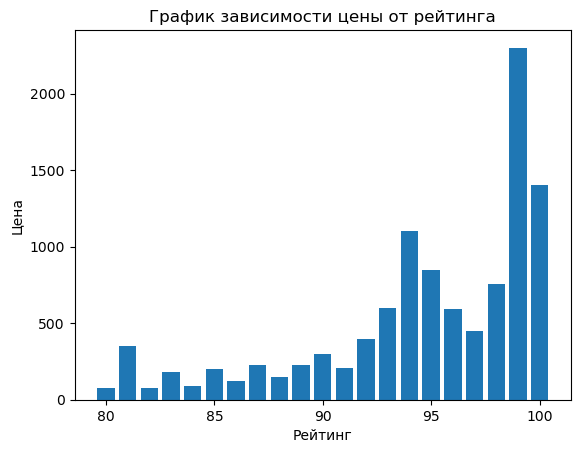

In [64]:

plt.bar(df['points'],df['price'])
plt.title('График зависимости цены от рейтинга')
plt.xlabel('Рейтинг')
plt.ylabel('Цена')
plt.show()

#  Задание

Для каждой страны рассчитайте долю каждого вида вина. В какой стране доля белого вина наибольшая, а в какой красного? 
(Нужен ответ вида: в стране А наибольшая доля белого вина, а в стране B — красного.

In [65]:
result = df.groupby(['country', 'color_code']).size().unstack(fill_value=0).idxmax(axis=1)

print(result)

country
Argentina         red
Australia         red
Austria         white
Brazil          other
Bulgaria          red
Canada            red
Chile             red
China           white
Croatia         white
Cyprus            red
France            red
Georgia         white
Germany           red
Greece            red
Hungary           red
Israel            red
Italy             red
Lebanon         white
Luxembourg        red
Mexico            red
Moldova           red
New Zealand     white
Portugal          red
Romania           red
Slovenia          red
South Africa      red
Spain             red
Switzerland       red
Turkey            red
US                red
US-France       white
Ukraine         other
Uruguay           red
dtype: object
